# Curse of dimensionality

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [99]:
class const():
    n = 100
    max_dim = 10
    epsilon = 0.01
    n_experiments = 100

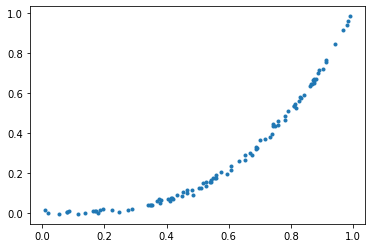

In [85]:
dim = 2
x = np.random.uniform(size=(const.n,dim))
y = x[:,0]**3 + np.random.normal(size=(const.n))*const.epsilon
plt.plot(x[:,0],y,'.');

In [92]:
model = LinearRegression()
model.fit(x , y)
x0 = np.zeros(shape=(1,2))
model.predict(x0)

array([-0.28282966])

In [93]:
# Try KNN:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(x , y)
model.predict(x0)

array([0.01034171])

### Now combining it all together

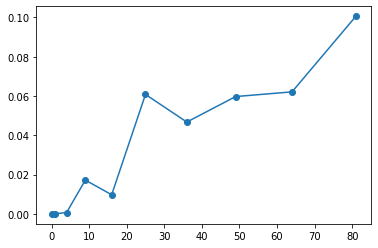

In [100]:
#model = LinearRegression()
model = KNeighborsRegressor(n_neighbors = 1)

result = np.zeros(shape=(const.max_dim , const.n_experiments))
dim_history = np.zeros(const.max_dim)
for idim in range(1,const.max_dim):
    dim = idim**2
    x0 = np.zeros(shape=(1,dim))
    for i_exp in range(const.n_experiments):
        x = np.random.uniform(size=(const.n , dim))
        y = x[:,0]**3 + np.random.normal(size=(const.n))*const.epsilon
        model.fit(x , y)        
        result[idim,i_exp] = model.predict(x0)**2
        dim_history[idim] = dim
        
plt.plot(dim_history , np.mean(result,axis=1) , '-o');